# Taller para el final

In [44]:
import sympy as sp
import numpy as np
import IPython
from IPython.display import display
import matplotlib.pylab as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Taylor superior

In [2]:
# Read the function
f = sp.parse_expr("x**2 + 2*x*y + y**3")
f

x**2 + 2*x*y + y**3

In [3]:
# Get the variables
x = sp.Matrix(sorted(list(f.free_symbols),key=str)).T
x

Matrix([[x, y]])

In [4]:
# Read the expasion poitn
x0 = sp.Matrix([1, 2]).T
x0

Matrix([[1, 2]])

In [5]:
f0 = f.subs(dict(zip(x, x0))).evalf()
f0

13.0000000000000

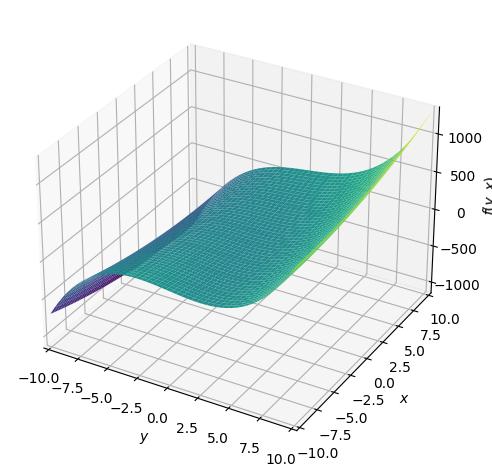

In [6]:
plot = sp.plotting.plot3d(f)

### Taylor de primer grado

Para una función de dos variables $f(x, y)$, el polinomio de taylor de primer grado cerca del punto $x_0$ es

$$
f(x) \approx\mathcal{L} \approx f(x_0) + [x - x_0]^t \nabla f(x_0) 
$$

In [7]:
gradient = sp.Matrix([f.diff(xi) for xi in x])
gradient

Matrix([
[   2*x + 2*y],
[2*x + 3*y**2]])

In [8]:
g0 = gradient.subs(dict(zip(x, x0)))
L = f0 + g0.dot(x - x0)
L

6*x + 14*y - 21.0

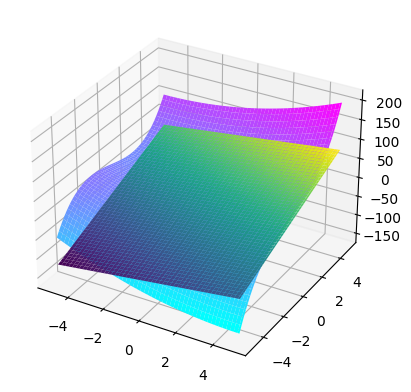

Text(0.5, 1.0, 'f')

Text(0.5, 1.0, 'L')

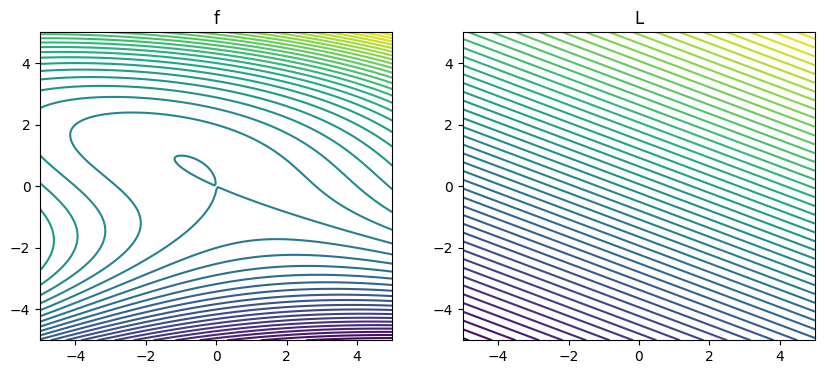

In [45]:
# Define the point to plot
P = (1, 1, f0)

# Create the meshgrid
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 200))
Z1 = sp.lambdify((x[0], x[1]), f, 'numpy')(X, Y)
Z2 = sp.lambdify((x[0], x[1]), L, 'numpy')(X, Y)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z1, cmap='cool')
ax.plot_surface(X, Y, Z2, cmap='viridis')

# Add the point to the plot
ax.scatter(P[0], P[1], P[2], color='r', s=10)
# ax.view_init(elev=20, azim=30)
# Show the plot
plt.show()

# CONTOUR
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
ax1.contour(X,Y,Z1,50)
ax1.set_title("f")
ax2.contour(X,Y,Z2,50)
ax2.set_title("L")
plt.show()

### Taylor de segundo grado
Teniendo $\mathcal{L}$, el polinomio de segundo grado (cuadratico) es

$$
\begin{align*}
f(x) \approx Q(x) &= f(x_0) + [x - x_0]^t\nabla f(x_0) + \cfrac{1}{2}[x - x_0]^t \nabla^2f_0(x - x_0) \\
&= \mathcal{L} + \cfrac{1}{2}[x - x_0]^t \nabla^2f_0(x - x_0)
\end{align*}
$$

In [10]:
hessian = sp.Matrix([[f.diff(xi).diff(xj) for xi in x] for xj in x])
hessian

Matrix([
[2,   2],
[2, 6*y]])

In [11]:
h0 = hessian.subs(dict(zip(x, x0)))
h0
Q = L + (1/2)*((x-x0)*h0).dot((x-x0).T)
Q

6*x + 14*y + 0.5*(x - 1)*(2*x + 2*y - 6) + 0.5*(y - 2)*(2*x + 12*y - 26) - 21.0

In [12]:
gradient_f0 = gradient.subs(list(zip(x, x0)))
hessian_f0 = hessian.subs(list(zip(x, x0)))

x_min = (hessian_f0.inv()*(-gradient_f0)).T + x0
x_min
f_min = f.subs(dict(zip(x, x_min))).evalf()
f_min

0.288000000000000

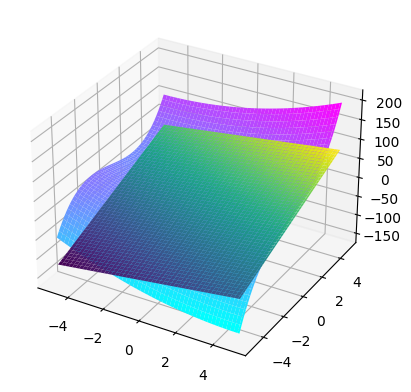

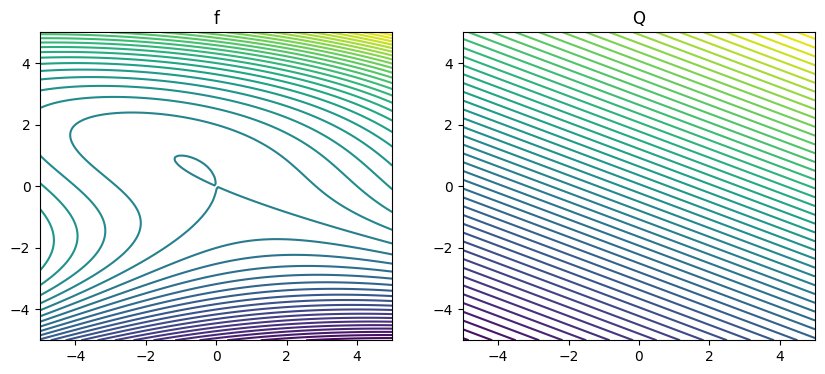

In [13]:
# Define the point to plot
P = (1, 1, f0)
P_min = (1, 1, f_min)

# Create the meshgrid

Z3 = sp.lambdify((x[0], x[1]), Q, 'numpy')(X, Y)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z1, cmap='cool')
ax.plot_surface(X, Y, Z2, cmap='viridis')

# Add the point to the plot
ax.scatter(P[0], P[1], P[2], color='r', s=10)
ax.scatter(P_min[0], P_min[1], P_min[2], color='r', s=10)

# ax.view_init(elev=20, azim=30)
# Show the plot
plt.show()

# CONTOUR
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
ax1.contour(X,Y,Z1,50)
ax1.set_title("f")
ax2.contour(X,Y,Z2,50)
ax2.set_title("Q")
plt.show()

## Gradiente desendente

$$
x_{k + 1} = x_k - \alpha \nabla f(x_k)
$$

In [14]:
alpha = 0.1
tol = 10**(-4)
max_iter = 100

xk = x0
for i in range(max_iter):
    gradient_fk = gradient.subs(dict(zip(x, xk)))
    xk = xk - alpha * gradient_fk.T

print(f"break at {i}")
xk
f_min = f.subs(dict(zip(x, xk))).evalf()
f_min

break at 99


-0.148147825791271

## Newton

$$
x_{k + 1} = x_k - \alpha \frac{\nabla f(x_k)^{-1}}{\nabla^2 f(x_k)}
$$

In [52]:
tolerance = 1e-6
alpha = 0.1
max_iter = 100

xk = x0
for i in range(max_iter):
    gradient_fk = gradient.subs(dict(zip(x, xk)))
    hessian_fk = hessian.subs(list(zip(x, xk)))
    delta = (alpha * hessian_fk.inv() * (-gradient_fk)).T
    xk = xk + delta 
    if abs(delta[0]) < tolerance and abs(delta[1]) < tolerance: break
        
print(f"break at {i}")
xk
f_min = f.subs(dict(zip(x, xk))).evalf()
f_min

Matrix([[0.78, 1.92]])

Matrix([[0.585831932773109, 1.84416806722689]])

Matrix([[0.414696526342253, 1.77230347365775]])

Matrix([[0.264084247509016, 1.70421575249098]])

Matrix([[0.131745828673611, 1.63972417132639]])

Matrix([[0.0156657721976576, 1.57865722780234]])

Matrix([[-0.0859614661063959, 1.5208521661064]])

Matrix([[-0.174752882847037, 1.46615451284704]])

Matrix([[-0.252156163855349, 1.41441763085535]])

Matrix([[-0.31946696927892, 1.36550228957892]])

Matrix([[-0.377844462570213, 1.31927625084021]])

Matrix([[-0.428325259418346, 1.27561386886135]])

Matrix([[-0.471835955111648, 1.23439570361035]])

Matrix([[-0.509204373054516, 1.19550814670335]])

Matrix([[-0.541169663020982, 1.15884305930493]])

Matrix([[-0.568391365050056, 1.12429742170561]])

Matrix([[-0.591457543529398, 1.09177299451939]])

Matrix([[-0.610892085840917, 1.06117599173191]])

Matrix([[-0.627161250830715, 1.03241676613261]])

Matrix([[-0.640679544200652, 1.00540950797236]])

Matrix([[-0.651814990590335, 0.980071957984872]])

Matrix([[-0.660893865522869, 0.956325136177952]])

Matrix([[-0.668204944426937, 0.934093088016512]])

Matrix([[-0.674003320529289, 0.913302649759907]])

Matrix([[-0.6785138384501, 0.893883234757655]])

Matrix([[-0.681934185752534, 0.875766642429334]])

Matrix([[-0.684437680431939, 0.858886891441059]])

Matrix([[-0.686175788327836, 0.843180078236044]])

Matrix([[-0.687280400667402, 0.828584261584789]])

Matrix([[-0.687865898383414, 0.815039373209063]])

Matrix([[-0.688031026490357, 0.802487153833441]])

Matrix([[-0.68786059866226, 0.790871113271035]])

Matrix([[-0.687427049258856, 0.780136512406754]])

Matrix([[-0.686791847423293, 0.770230364256401]])

Matrix([[-0.686006785555767, 0.761101450705564]])

Matrix([[-0.685115152478449, 0.752700351113267]])

Matrix([[-0.68415279996225, 0.744979478733586]])

Matrix([[-0.683149109985231, 0.737893120879433]])

Matrix([[-0.682127869119351, 0.731397478924133]])

Matrix([[-0.681108055764809, 0.725450704589113]])

Matrix([[-0.68010454552485, 0.720012929466723]])

Matrix([[-0.679128739785386, 0.715046285333072]])

Matrix([[-0.678189122476557, 0.710514913469475]])

Matrix([[-0.677291749992365, 0.706384961885991]])

Matrix([[-0.676440679280541, 0.702624569984804]])

Matrix([[-0.675638339147433, 0.69920384078127]])

Matrix([[-0.674885849821984, 0.696094801292437]])

Matrix([[-0.674183295769755, 0.693271352093162]])

Matrix([[-0.673529956633228, 0.690709207324295]])

Matrix([[-0.672924500997554, 0.688385826619515]])

Matrix([[-0.672365147447085, 0.68628034050685]])

Matrix([[-0.67184979709727, 0.684373470851058]])

Matrix([[-0.671376141470972, 0.682647447849381]])

Matrix([[-0.670941749250778, 0.681085924991346]])

Matrix([[-0.670544135091738, 0.67967389325825]])

Matrix([[-0.670180813332976, 0.678397595682836]])

Matrix([[-0.669849339110864, 0.677244443225739]])

Matrix([[-0.669547339057837, 0.676202932761224]])

Matrix([[-0.669272533474343, 0.675262567807392]])

Matrix([[-0.669022751590149, 0.674413782489893]])

Matrix([[-0.668795941286575, 0.673647869096344]])

Matrix([[-0.668590174433704, 0.672956909462496]])

Matrix([[-0.668403648805372, 0.672333710331285]])

Matrix([[-0.668234687368519, 0.671771742741841]])

Matrix([[-0.66808173560034, 0.67126508543633]])

Matrix([[-0.667943357364616, 0.670808372217006]])

Matrix([[-0.667818229775359, 0.67039674314251]])

Matrix([[-0.667705137389275, 0.670025799419711]])

Matrix([[-0.667602965996453, 0.669691561823846]])

Matrix([[-0.667510696219097, 0.66939043246375]])

Matrix([[-0.667427397079267, 0.669119159699455]])

Matrix([[-0.667352219656822, 0.668874806014991]])

Matrix([[-0.667284390926618, 0.66865471864897]])

Matrix([[-0.667223207838324, 0.668456502788441]])

Matrix([[-0.667168031681746, 0.668277997136851]])

Matrix([[-0.667118282764541, 0.668117251674136]])

Matrix([[-0.667073435416693, 0.667972507435328]])

Matrix([[-0.667033013326581, 0.667842178143353]])

Matrix([[-0.666996585206284, 0.667724833541379]])

Matrix([[-0.666963760778398, 0.667619184279984]])

Matrix([[-0.66693418707291, 0.667524068224336]])

Matrix([[-0.666907545019989, 0.667438438056273]])

Matrix([[-0.666883546322935, 0.667361350055591]])

Matrix([[-0.666861930594514, 0.667291953953904]])

Matrix([[-0.666842462739549, 0.667229483763]])

Matrix([[-0.666824930566633, 0.667173249487739]])

Matrix([[-0.666809142612147, 0.667122629641143]])

Matrix([[-0.666794926160335, 0.66707706448643]])

Matrix([[-0.666782125443857, 0.667036049937343]])

Matrix([[-0.666770600010083, 0.666999132054221]])

Matrix([[-0.666760223239206, 0.66696590207893]])

Matrix([[-0.66675088100118, 0.666935991956932]])

Matrix([[-0.666742470439362, 0.666909070299538]])

Matrix([[-0.666734898869616, 0.666884838743774]])

Matrix([[-0.666728082784509, 0.666863028671252]])

Matrix([[-0.666721946953025, 0.666843398251094]])

Matrix([[-0.666716423607015, 0.666825729775276]])

Matrix([[-0.666711451706331, 0.666809827257766]])

Matrix([[-0.666706976275288, 0.666795514271579]])

Matrix([[-0.666702947803719, 0.666782632000382]])

break at 99


Matrix([[-0.666702947803719, 0.666782632000382]])

-0.148148128349059